In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
np.random.seed(2095)

In [8]:
data = pd.read_csv("diabetes.csv")

In [9]:
data.shape

(768, 8)

In [10]:
data.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
data = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'] ]

In [17]:
data.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [21]:
data = data.astype(float)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Outcome                   768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


<Axes: >

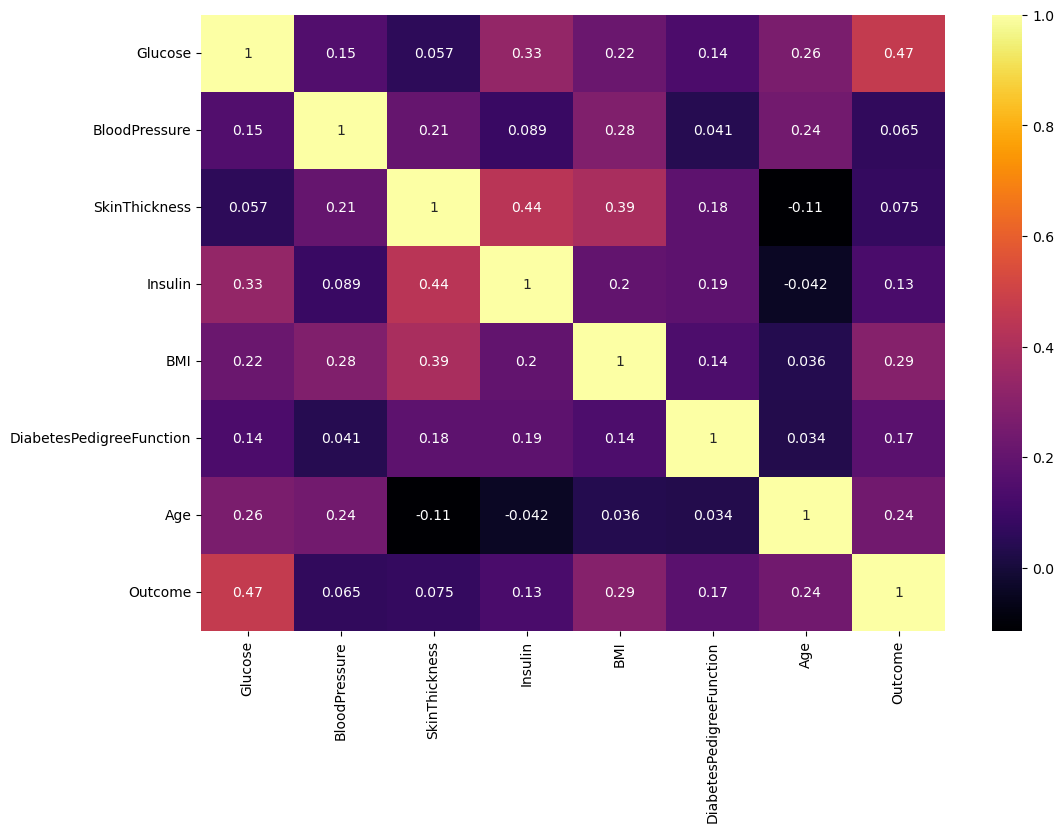

In [23]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),cmap='inferno', annot=True)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

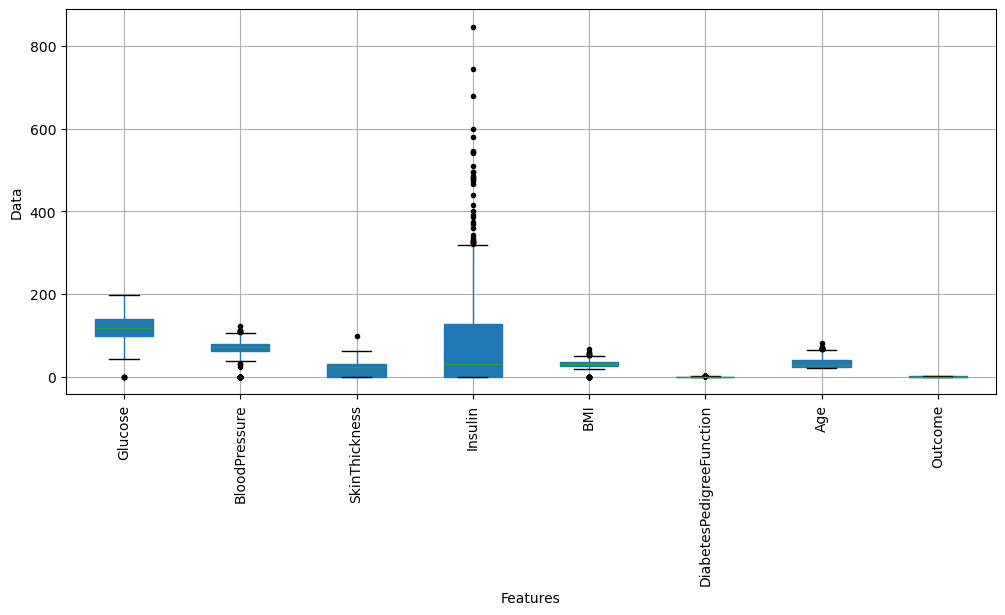

In [24]:
plt.subplots(figsize=(12,5))
data.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

In [25]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [26]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = data.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [27]:
X = data.iloc[:, :-1]

In [28]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

Glucose Contains Outlier
BloodPressure Contains Outlier
SkinThickness Contains Outlier
Insulin Contains Outlier
BMI Contains Outlier
DiabetesPedigreeFunction Contains Outlier
Age Contains Outlier


In [29]:
for i in range (50):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

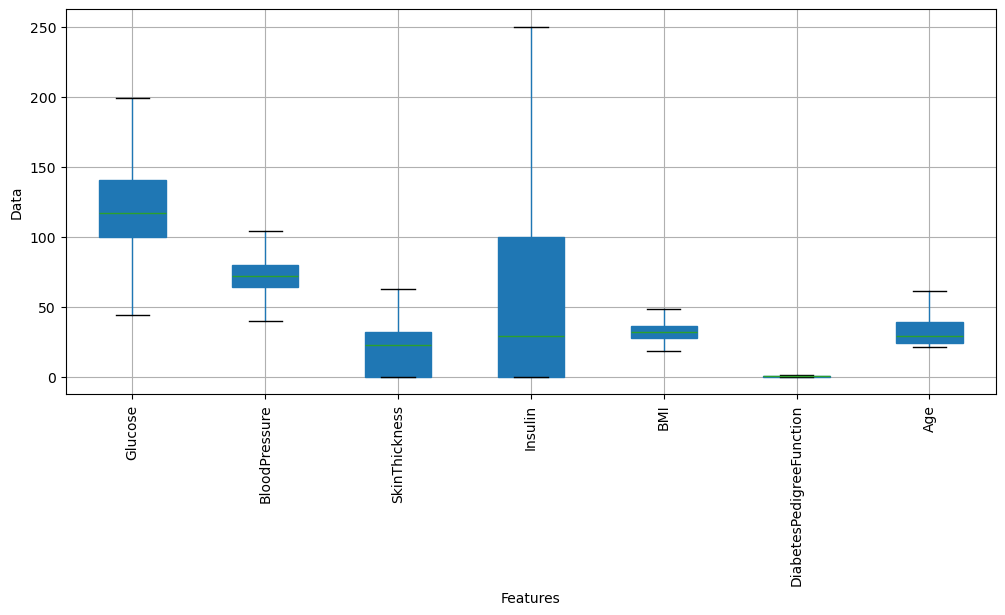

In [30]:
plt.subplots(figsize=(12,5))
X.boxplot(patch_artist=True, sym="k.")
plt.xlabel('Features')
plt.ylabel('Data')
plt.xticks(rotation=90)

In [31]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.866045,-0.009945,0.928238,-0.792609,0.237708,1.017166,1.783188
1,-1.205066,-0.562070,0.545788,-0.792609,-0.876820,-0.260674,-0.102476
2,2.016662,-0.746112,-1.302720,-0.792609,-1.402240,1.225510,-0.003231
3,-1.073567,-0.562070,0.163338,0.595090,-0.637992,-1.112568,-1.094931
4,0.504422,-2.954614,0.928238,1.687534,1.750281,-0.161132,0.096015


In [39]:
label = data["Outcome"]

In [40]:
encoder = LabelEncoder()
label = encoder.fit_transform(label)

In [41]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [42]:
print(X_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

(614, 7) (154,)
(614,) (154,)


In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

xnew2=SelectKBest(f_classif, k=7).fit_transform(X, y)

In [45]:
 import sklearn.feature_selection as fs
 import matplotlib.pyplot as plt
 df2 = fs.SelectKBest(k='all')

 df2.fit(X, y)

 names = X.columns.values[df2.get_support()]

 scores = df2.scores_[df2.get_support()]

 names_scores = list(zip(names, scores))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Features','F_Scores'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Features'], ascending =

  [False, True])

 print(ns_df_sorted)

                   Features    F_Scores
0                   Glucose  245.667855
6                       Age   79.385372
4                       BMI   68.570153
1             BloodPressure   21.820218
5  DiabetesPedigreeFunction   14.502288
2             SkinThickness    3.489838
3                   Insulin    3.165892


In [47]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices
logit_model = sm.OLS(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.191    
Dependent Variable:     y                AIC:                         969.4762 
Date:                   2024-10-06 11:21 BIC:                         1000.4162
No. Observations:       614              Log-Likelihood:              -477.74  
Df Model:               7                F-statistic:                 21.67    
Df Residuals:           607              Prob (F-statistic):          3.63e-26 
R-squared (uncentered): 0.200            Scale:                       0.28076  
--------------------------------------------------------------------------------
                              Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
--------------------------------------------------------------------------------
Glucose                       0.1896    0.0228   8.3276  0.0000   0.1449  0.2343
BloodPressure                 0.0027    0.0229   0.1182  0.9

In [48]:
np.exp(result.params)

Glucose                     1.208797
BloodPressure               1.002712
SkinThickness               1.006275
Insulin                     0.982953
BMI                         1.094674
DiabetesPedigreeFunction    1.035717
Age                         1.078466
dtype: float64

In [49]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                5%       95%  Odds Ratio
Glucose                   1.155931  1.264080    1.208797
BloodPressure             0.958567  1.048891    1.002712
SkinThickness             0.956364  1.058791    1.006275
Insulin                   0.935472  1.032845    0.982953
BMI                       1.044001  1.147805    1.094674
DiabetesPedigreeFunction  0.991031  1.082417    1.035717
Age                       1.030875  1.128254    1.078466


In [50]:
result.pvalues.sort_values()

Glucose                     5.491825e-16
BMI                         1.951621e-04
Age                         1.070720e-03
DiabetesPedigreeFunction    1.186497e-01
Insulin                     4.954982e-01
SkinThickness               8.092571e-01
BloodPressure               9.059862e-01
dtype: float64

In [51]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',
                                                # np.unique(y_train),
                                                # y_train)
#model.fit(X_train, y_train, class_weight=class_weights)

Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


<Axes: xlabel='weight'>

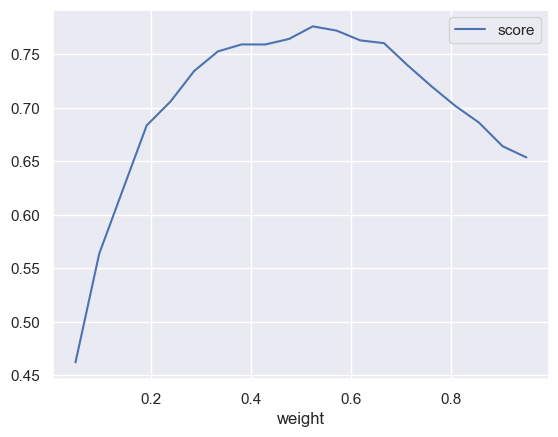

In [52]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='accuracy',
    cv=10
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [53]:
#LR

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



0.7212121212121212

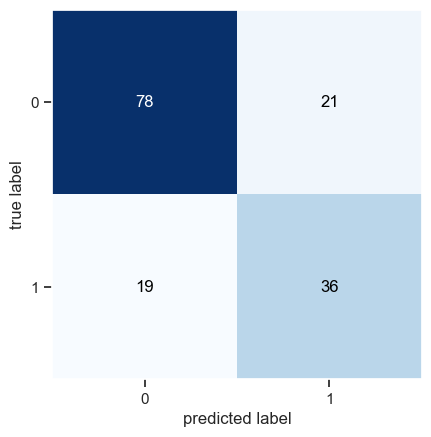

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt
lr = LogisticRegression(class_weight='balanced',random_state=420)

# Fit..
lr.fit(X_train, y_train)

# Predict..
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        99
           1       0.72      0.78      0.75        55

    accuracy                           0.81       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.82      0.81      0.81       154



0.805050505050505

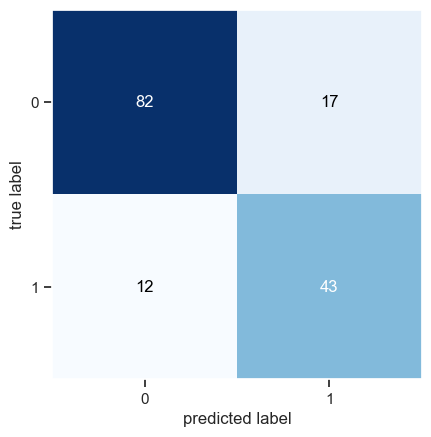

In [56]:
from sklearn.svm import SVC

clf_svc_rbf = SVC(kernel="rbf",class_weight='balanced',random_state=4200)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True)
#plt.show()

#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        99
           1       0.68      0.51      0.58        55

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



0.6888888888888889

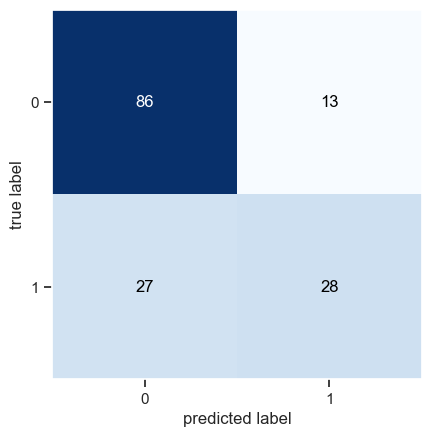

In [57]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(class_weight='balanced',random_state=4200)
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_rd)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True,linewidths=.3)
#plt.show()

print(classification_report(y_test,y_pred_rd))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rd))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rd)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



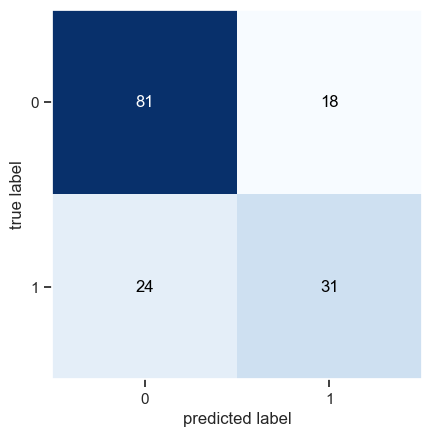

0.6909090909090908

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
clf_dt = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=4200)
clf_dt.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred_clf_dt = clf_dt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_clf_dt))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_clf_dt)

# Uncomment the following lines if you want to use seaborn heatmap for visualization
# plt.figure(figsize=(5,5))
# sns.heatmap(cm, annot=True)
# plt.show()

# Alternatively, you can plot the confusion matrix using sklearn's built-in function
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_dt))
plt.show()

# ROC Curve and AUC score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print AUC score
roc_auc

In [58]:
#svm

In [59]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
class_weight='balanced'
model = SVC(kernel='rbf', C=1, class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7636 (0.0295)


array([0.75324675, 0.77272727, 0.72077922, 0.75974026, 0.81168831])

# from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
class_weight='balanced'
model = LogisticRegression(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

In [63]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# create model
class_weight='balanced'
model = RandomForestClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7519 (0.0300)


array([0.77272727, 0.77272727, 0.73376623, 0.77922078, 0.7012987 ])

In [71]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=4200)
# create model
model = DecisionTreeClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.6922 (0.0416)


array([0.72077922, 0.66883117, 0.74025974, 0.70779221, 0.62337662])